<a href="https://colab.research.google.com/github/pd1298/US-Airline-Sentiment-Classification-using-Universal-Language-Model/blob/master/Data_Analysis_of_Twitter_US_Airline_Sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRODUCTION**

In this notebook, we focus on the analysis of the dataset, [**Twitter-US-Airline-Sentiment**](https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv)

This dataset shows the sentiment of travellers in Februaruy 2015 who have expressed their feelings on the Twitter microbloging website. 

The sentiments classified in the dataset are :


1.   Positive
2.   Negative 
3.   Neutral 



In [ ]:
#Access to dataset from Google Drive
from google.colab import drive
drive.mount('/content/G-drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/G-drive


In [ ]:
#Importing Dependencies 

# For data manipulation and mathematical computing
import pandas as pd
import numpy as np

# For Statistical Plotting 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# For Word Cloud Generation
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Loading the csv dataset into the dataframe
df = pd.read_csv("/content/G-drive/My Drive/Fellowship/Tweets_main.csv")

In [ ]:
#Display first five rows in the dataset
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,latitude,longitude
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35.888455,-119.273781
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,37.770971,-119.941025
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,35.684863,-119.709299
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,37.061159,-119.279135
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,36.790587,-120.867752


## **Dataset**

As we can see , along with the tweet and the sentiment of the airline, we have several meta data available such as :

1.   retweet_count
2.   tweet_created	
3.   latitude	
4.   longitude




In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count,latitude,longitude
count,1.464000e+04,14640.000000,10522.000000,14640.000000,14640.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650,39.139901,-98.687615
std,7.791112e+14,0.162830,0.330440,0.745778,3.599528,18.731383
min,5.675883e+17,0.335000,0.000000,0.000000,24.295539,-121.892659
25%,5.685592e+17,0.692300,0.360600,0.000000,36.664544,-119.106167
50%,5.694779e+17,1.000000,0.670600,0.000000,40.060817,-101.278813
75%,5.698905e+17,1.000000,1.000000,0.000000,40.759700,-74.002575
max,5.703106e+17,1.000000,1.000000,44.000000,59.658972,-73.388100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  latitude                      14640 non-null  float64
 11  longitude                     14640 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.3+ MB


## **GRAPHICAL ANALYSIS**

Below, are the statistical plotting of dataset. We observe the trend of the popularity of the airline, and the response of sentiment they have recieved form the public. 

1. In the first plot, we see that Virgin Amreica has recieved the least tweets whereas United has recieved maximum tweets in comparison to other airlines. This highlights that there are many travellers wiht United Airlines , irrespective of the the response they have recieved. The other airlines have recieved competetive reactions overall. 
2. In the second plot, though there are a high number of travellers with United, it has recieved the most negative reviews. Also it has recieved the maximum neutral reviews. 
3. In the same plot, we also observe that overall, there are more number of negative tweets reported for each airline in comparison to the positive tweets. This shows that twitter handlers are more active while reporting the negative feedback on social media. very less neutral and positive tweets are reported.  


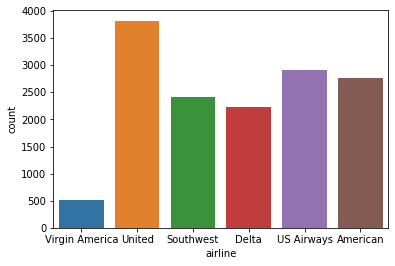

In [ ]:
# Plotting the number of tweets concerned to a particular airline
ax = sns.countplot(x = 'airline', data = df)

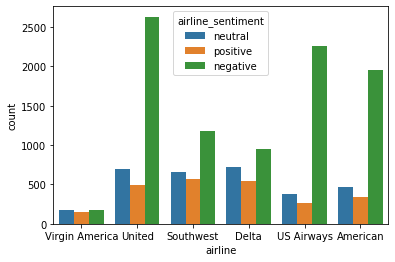

In [ ]:
#The comparison of the sentiments of tweets of each airline
ax = sns.countplot(x = 'airline', hue = 'airline_sentiment', data = df)

## **WORD CLOUD**

Below, we plot the word cloud to vizualise the words mostly used while tweeting their sentiments. 
1. For ***neutral***, we can observe that United and Southwest Ailrines have the maximum frequency. Words like ***today, now, going*** have been highlighted. 
2. For ***positive*** reviews , we can spot words like ***thank you , best , awesome service , great experience*** to be highlighted with United, SouthWest and American Air. 
3. For ***negative*** reviews, word such as ***cancelled , waiting, delay and please*** words have been highlighted. 

In [ ]:
# Selecting the tweets having corresponding sentiment : Positive, Negative and Neutral and strong then into the dataframe required for Word Cloud. 
df_pos = df[df['airline_sentiment']=='positive']
df_neg = df[df['airline_sentiment']=='negative']
df_neu = df[df['airline_sentiment']=='neutral']

(-0.5, 399.5, 199.5, -0.5)

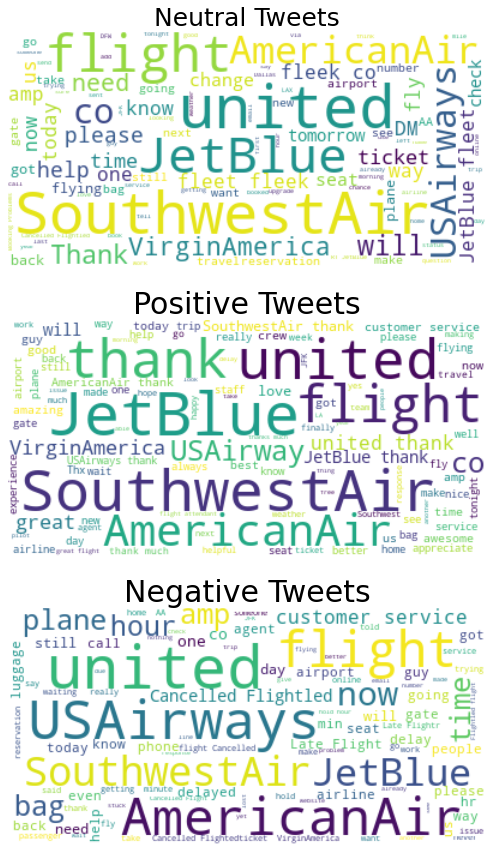

In [ ]:
tweet_neg = " ".join(word for word in df_neg.text)
tweet_pos = " ".join(word for word in df_pos.text)
tweet_neu = " ".join(word for word in df_neu.text)

fig, ax = plt.subplots(3, 1, figsize  = (15,15))
# Create and generate a word cloud image:
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neg)
wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_pos)
wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neu)

# Display the generated image:
ax[0].imshow(wordcloud_neu, interpolation='bilinear')
ax[0].set_title('Neutral Tweets', fontsize=25)
ax[0].axis('off')
ax[1].imshow(wordcloud_pos, interpolation='bilinear')
ax[1].set_title('Positive Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neg, interpolation='bilinear')
ax[2].set_title('Negative Tweets',fontsize=30)
ax[2].axis('off')
